# Plotting Weather Patterns - NYC, New York, United States
We will create a line graph of the record high and record low temperatures by day of the year over the period 2005-2014 and shade the area between them. We will also overlay a scatter plot indicating the days in 2015 that broke a record high or low for 2005-2014.

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import mplleaflet

## Stations near NYC, New York, US
First, we are going to show on a map the stations where the data comes.

In [3]:
bin_df = pd.read_csv('BinSize_d400.csv')
bin_df.head()

,ID,LATITUDE,LONGITUDE,ELEVATION,STATE,NAME,GSNFLAG,HCNFLAG,WMOID,x,y,x_group,y_group,xy_group,hash
0,AE000041196,25.333,55.517,34.0,NaN,SHARJAH INTER. AIRP,GSN,NaN,41196.0,5.579578e+06,2.816905e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
1,AEM00041194,25.255,55.364,10.4,NaN,DUBAI INTL,NaN,NaN,41194.0,5.567782e+06,2.808232e+06,5497601.479782179 to 5594934.908498545,2772265.475723952 to 2869598.904440318,"5497601.479782179 to 5594934.908498545, 277226...",1f6f0e89f4e937d934fe9acde2545e0d66bbcfe3b66320...
2,AEM00041217,24.433,54.651,26.8,NaN,ABU DHABI INTL,NaN,NaN,41217.0,5.532707e+06,2.716829e+06,5497601.479782179 to 5594934.908498545,2674932.047007587 to 2772265.4757239525,"5497601.479782179 to 5594934.908498545, 267493...",35c9093084d26708afc5b482ea15ba52e3f20fb7cd781f...
3,AEM00041218,24.262,55.609,264.9,NaN,AL AIN INTL,NaN,NaN,41218.0,5.637301e+06,2.697815e+06,5594934.908498544 to 5692268.33721491,2674932.047007587 to 2772265.4757239525,"5594934.908498544 to 5692268.33721491, 2674932...",2a6a7edad90579049fd1b3c3a990e8a8be90cb1975118e...
4,AFM00040990,31.500,65.850,1010.0,NaN,KANDAHAR AIRPORT,NaN,NaN,40990.0,6.243199e+06,3.502645e+06,6178935.480796736 to 6276268.909513102,3453599.476738509 to 3550932.9054548745,"6178935.480796736 to 6276268.909513102, 345359...",039e75bbef55baa3fecc0568dc3b245666a98b1bcba6b4...


In [8]:
# Hash ID for stations near NYC
hashid = 'cf72033452b01be31d061c5e1a6a67b550983a5b53df44866f4b108c'

bin_df = bin_df[bin_df['hash'] == hashid]
longitudes = bin_df['LONGITUDE'].tolist()
latitudes = bin_df['LATITUDE'].tolist()

plt.figure(figsize=(8,8))
plt.scatter(longitudes, latitudes, color='red', alpha=0.8, s=200)

mplleaflet.display()

In [11]:
<img src="map.png" width=60 height=60>

SyntaxError: invalid syntax (<ipython-input-11-15a56db53c4d>, line 1)

## Cleaning
Second, we are going to clean the date and obtained the data needed for the 2005-2014 period and 2015.

In [360]:
#data from 2005 to 2015
df = pd.read_csv('{}.csv'.format(hashid))
df.head()

,ID,Date,Element,Data_Value
0,USW00054787,2007-09-03,TMAX,256
1,USC00306774,2006-06-13,TMAX,283
2,USC00306774,2009-08-26,TMIN,150
3,USC00288644,2011-03-04,TMIN,-100
4,USC00305310,2005-03-27,TMIN,-33


In [361]:
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date')
# Leap days are removed
df = df[~((df.Date.dt.month == 2) & (df.Date.dt.day == 29))]
df['Data_Value'] = df['Data_Value'] / 10



### Temperatures by day of the year over the period 2005-2014

In [362]:
temp_2005_2014 = df[df['Date'] < '2015']

temperatures_2005_2014 = temp_2005_2014.groupby(by=[temp_2005_2014.Date.dt.month,
                                                    temp_2005_2014.Date.dt.day]).agg({'Data_Value': [np.max, np.min]})
temperatures_2005_2014.columns = ['TMAX', 'TMIN']
temperatures_2005_2014.index = list(range(1, 366))

temperatures_2005_2014

,TMAX,TMIN
1,17.2,-15.0
2,16.1,-16.1
3,17.8,-19.3
4,15.6,-23.9
5,17.8,-21.7
...,...,...
361,14.4,-10.6
362,18.3,-10.0
363,18.9,-11.7
364,12.2,-16.6


### Temperatures by day of the year for 2015

In [363]:
temp_2015 = df[~df.index.isin(temp_2005_2014.index)]
temperatures_2015 = temp_2015.groupby(by=[temp_2015.Date.dt.month,
                                         temp_2015.Date.dt.day]).agg({'Data_Value': [np.max, np.min]})
temperatures_2015.columns = ['TMAX', 'TMIN']
temperatures_2015.index = list(range(1, 366))

temperatures_2015

,TMAX,TMIN
1,4.4,-12.2
2,6.1,-11.7
3,8.9,-8.9
4,13.9,-6.7
5,12.2,-9.9
...,...,...
361,16.7,3.9
362,16.1,-2.1
363,9.4,-3.9
364,10.6,-3.9


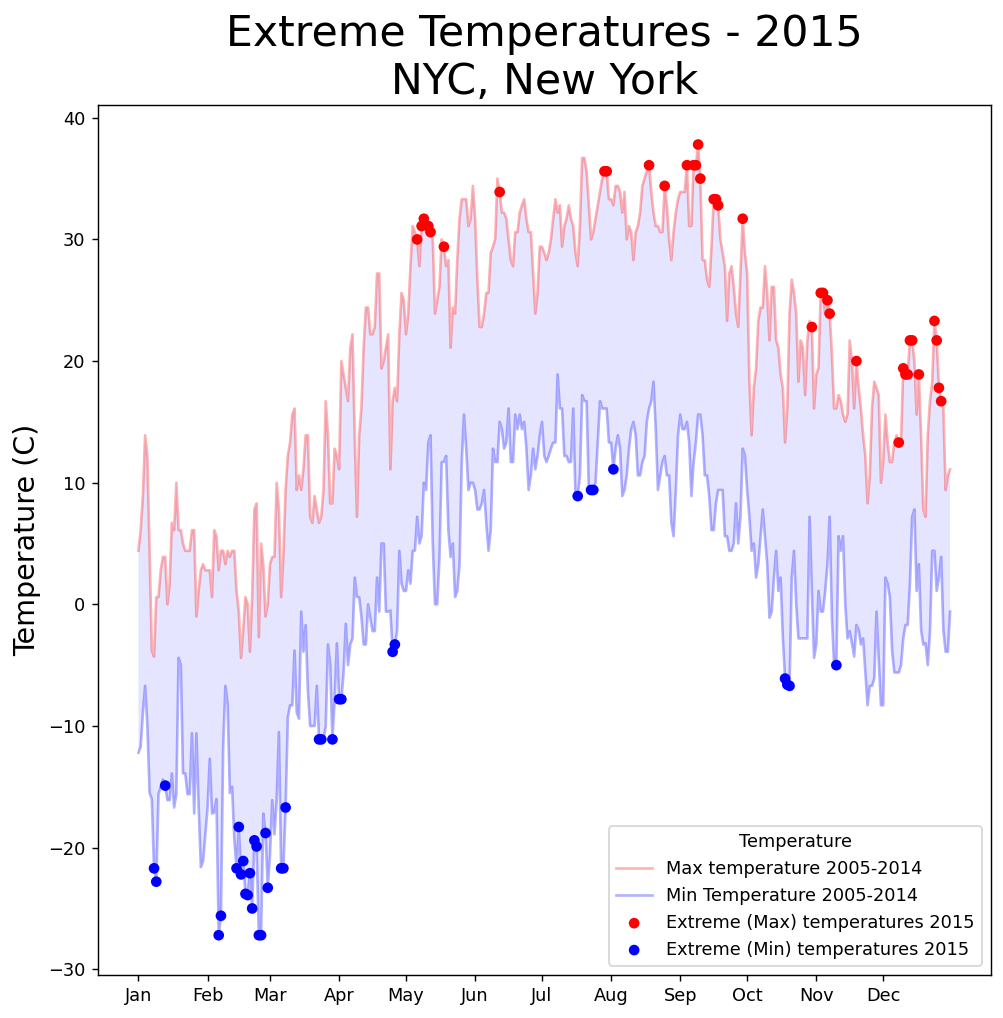

In [364]:
%matplotlib inline

# plot high and low temperature for 2005 - 2014 period
days = list(range(1, 366))
highs = temperatures_2015['TMAX']
lows = temperatures_2015['TMIN']


fig = plt.figure(dpi=128, figsize=(9, 9))
plt.plot(days, highs, c='red', alpha=0.3, label='Max temperature 2005-2014')
plt.plot(days, lows, c='blue', alpha=0.3, label='Min Temperature 2005-2014')
plt.fill_between(days, highs, lows, facecolor='blue', alpha=0.1)

# plot high and low temperature for 2005 - 2014 period
highs_2015 = temperatures_2015[temperatures_2015['TMAX'] > temperatures_2005_2014['TMAX']]
highs_2015_x = highs_2015.index.tolist()
highs_2015_y = highs_2015['TMAX'].tolist()

lows_2015 = temperatures_2015[temperatures_2015['TMIN'] < temperatures_2005_2014['TMIN']]
lows_2015_x = lows_2015.index.tolist()
lows_2015_y = lows_2015['TMIN'].tolist()

plt.scatter(highs_2015_x, highs_2015_y, c='red', edgecolors='none', label='Extreme (Max) temperatures 2015')
plt.scatter(lows_2015_x, lows_2015_y, c='blue', edgecolors='none', label='Extreme (Min) temperatures 2015')

#Help us to identify temperature during certain period of time
plt.legend(title='Temperature')

# set title and label

plt.title('Extreme Temperatures - 2015\nNYC, New York', fontsize=24)
plt.ylabel('Temperature (C)', fontsize=16)

# Set xticks
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
          'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
month_starts = temp_2015.groupby(by=[temp_2015.Date.dt.month]).agg({'Date': np.min})
month_starts = month_starts.apply(lambda x: x.dt.day_of_year)['Date'].tolist()

plt.gca().set_xticks(month_starts)
plt.gca().set_xticklabels(months)


plt.savefig('extreme_temperature_2015_nyc.png')
plt.show()